# The cleaning and visualization

In [1]:
#import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [70]:
#loading the dataset

data = pd.read_csv("C:/Users/terre/Downloads/African_pastored_churches - African_churches (2).csv")


In [30]:
data.head()

,query,name,site,pastored_by_africans,pastors_name,populated_immigrant_country,type,subtype,category,about,...,email_3_full_name,phone_1,phone_2,facebook,instagram,linkedin,whatsapp,twitter,vimeo,youtube
0,"african churches, 75251, Dallas, TX, US",Rccg Victory Center Dallas,http://www.rccgdallas.org/,Yes,NaN,Nigeria,Church,Church,Church,"{""Accessibility"": {""Wheelchair accessible entr...",...,NaN,NaN,NaN,NaN,https://www.instagram.com/victorycenterdallas,NaN,NaN,https://twitter.com/DallasRccg,NaN,https://www.youtube.com/channel/UCDrm2qh9_3Cr9...
1,"african churches, 75320, Dallas, TX, US",Macedonia Baptist Church,https://www.mmbcdallas.org/,Yes,"Pastor Frederick Norris, Sr.",South Africa,Baptist church,Baptist church,Baptist church,"{""Accessibility"": {""Wheelchair accessible entr...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"african churches, 75320, Dallas, TX, US",Pilgrim Rest Missionary Baptist Church,http://www.pilgrimrestdallas.org/,Yes,Dr. Carlos D. Williams,South Africa,Baptist church,"Baptist church, Church",Baptist church,"{""Accessibility"": {""Wheelchair accessible entr...",...,NaN,NaN,NaN,http://www.facebook.com/PRMBCdallas,https://www.instagram.com/pilgrimrestdallas,http://www.linkedin.com/company/4028841,NaN,NaN,NaN,https://www.youtube.com/channel/UC0u-gT9WLxfkL...
3,"african churches, 75238, Dallas, TX, US",Gospel Light Eritrean Baptist Church Dallas,https://www.berhanwongeldallas.org/,No,NaN,Cameroon,Baptist church,Baptist church,Baptist church,"{""Accessibility"": {""Wheelchair accessible entr...",...,NaN,NaN,NaN,http://facebook.com/berhanwongeldallas,NaN,NaN,NaN,http://twitter.com/bwongeldallas,http://vimeo.com/user30295325,NaN
4,"african churches, 75238, Dallas, TX, US",The Shining Light Church,http://www.sliwot.org/,Yes,NaN,Togo,Non-denominational church,"Non-denominational church, Church",Non-denominational church,"{""Accessibility"": {""Wheelchair accessible entr...",...,NaN,9722877729,NaN,https://www.facebook.com/brainerdbaptist,http://instagram.com/brainerdbaptist,NaN,NaN,https://twitter.com/BrainerdBaptist,NaN,NaN


# Data exploration

We will explore the dataset to understand the distribution and characteristics of the data. This will involve examining the variables and their relationships.


In [31]:
data.shape

(50, 62)

In [32]:
data.columns

Index(['query', 'name', 'site', 'pastored_by_africans', 'pastors_name',
       'populated_immigrant_country', 'type', 'subtype', 'category', 'about',
       'phone', 'full_address', 'borough', 'street', 'city', 'postal_code',
       'state', 'us_state', 'country', 'country_code', 'latitude', 'longitude',
       'time_zone', 'plus_code', 'area_service', 'working_hours',
       'working_hours_old_format', 'rating', 'reviews', 'reviews_link',
       'reviews_tags', 'reviews_per_score', 'reviews_per_score_1',
       'reviews_per_score_2', 'reviews_per_score_3', 'reviews_per_score_4',
       'reviews_per_score_5', 'photos_count', 'photo', 'street_view',
       'located_in', 'other_hours', 'business_status', 'verified',
       'location_link', 'email_1', 'email_1_full_name', 'email_1_title',
       'email_2', 'email_2_full_name', 'email_2_title', 'email_3',
       'email_3_full_name', 'phone_1', 'phone_2', 'facebook', 'instagram',
       'linkedin', 'whatsapp', 'twitter', 'vimeo', 'youtube']

In [33]:
# Check the data types of each column
print(data.dtypes)

query                   object
name                    object
site                    object
pastored_by_africans    object
pastors_name            object
                         ...  
linkedin                object
whatsapp                object
twitter                 object
vimeo                   object
youtube                 object
Length: 62, dtype: object


In [34]:
# Check for missing values
print(data.isnull().sum())

query                    0
name                     0
site                     0
pastored_by_africans     2
pastors_name            11
                        ..
linkedin                41
whatsapp                49
twitter                 30
vimeo                   48
youtube                 32
Length: 62, dtype: int64


In [35]:
print(data.duplicated().sum())

0


In [36]:
#check the statistics
data.describe()

,postal_code,latitude,longitude,rating,reviews,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,other_hours
count,48.000000,50.000000,50.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,48.000000,0.0
mean,75224.520833,32.660032,-96.449629,4.736957,98.956522,2.347826,0.717391,2.021739,5.434783,88.434783,83.291667,NaN
std,16.542646,0.697325,2.900002,0.179330,210.191443,5.164913,1.500564,3.303124,9.687683,195.427583,229.090427,NaN
min,75201.000000,28.057658,-100.076842,4.300000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
25%,75215.000000,32.701733,-96.839304,4.700000,15.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.750000,NaN
50%,75223.500000,32.762985,-96.795373,4.700000,25.000000,1.000000,0.000000,1.000000,2.000000,20.000000,10.000000,NaN
75%,75232.250000,32.832781,-96.745405,4.875000,67.000000,2.750000,1.000000,2.000000,4.000000,58.000000,31.750000,NaN
max,75287.000000,33.003440,-76.618311,5.000000,920.000000,28.000000,8.000000,15.000000,46.000000,896.000000,1147.000000,NaN


# Data cleaning

We will start by cleaning the dataset, removing any unnecessary columns and handling missing values, if any.


In [37]:
data.columns

Index(['query', 'name', 'site', 'pastored_by_africans', 'pastors_name',
       'populated_immigrant_country', 'type', 'subtype', 'category', 'about',
       'phone', 'full_address', 'borough', 'street', 'city', 'postal_code',
       'state', 'us_state', 'country', 'country_code', 'latitude', 'longitude',
       'time_zone', 'plus_code', 'area_service', 'working_hours',
       'working_hours_old_format', 'rating', 'reviews', 'reviews_link',
       'reviews_tags', 'reviews_per_score', 'reviews_per_score_1',
       'reviews_per_score_2', 'reviews_per_score_3', 'reviews_per_score_4',
       'reviews_per_score_5', 'photos_count', 'photo', 'street_view',
       'located_in', 'other_hours', 'business_status', 'verified',
       'location_link', 'email_1', 'email_1_full_name', 'email_1_title',
       'email_2', 'email_2_full_name', 'email_2_title', 'email_3',
       'email_3_full_name', 'phone_1', 'phone_2', 'facebook', 'instagram',
       'linkedin', 'whatsapp', 'twitter', 'vimeo', 'youtube']

In [38]:
# Drop irrelevant columns
data = data.drop(['query', 'type', 'city', 'state', 'us_state', 'country', 'country_code', 'plus_code', 'reviews_tags', 'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3', 'reviews_per_score_4', 'reviews_per_score_5', 'photos_count', 'photo', 'street_view', 'located_in', 'other_hours', 'whatsapp', 'vimeo'], axis=1)


In [39]:
# Drop irrelevant columns
data = data.drop(['phone_1', 'phone_2', 'email_2_title', 'email_3_full_name', 'email_2_full_name', 'email_1_full_name', 'email_1_title'], axis=1)

In [40]:
data.head()

,name,site,pastored_by_africans,pastors_name,populated_immigrant_country,subtype,category,about,phone,full_address,...,verified,location_link,email_1,email_2,email_3,facebook,instagram,linkedin,twitter,youtube
0,Rccg Victory Center Dallas,http://www.rccgdallas.org/,Yes,NaN,Nigeria,Church,Church,"{""Accessibility"": {""Wheelchair accessible entr...",NaN,"11836 Judd Ct #352, Dallas, TX 75243",...,False,https://www.google.com/maps/place/Rccg+Victory...,info@rccgdallas.org,victorycenterdallas@gmail.com,NaN,NaN,https://www.instagram.com/victorycenterdallas,NaN,https://twitter.com/DallasRccg,https://www.youtube.com/channel/UCDrm2qh9_3Cr9...
1,Macedonia Baptist Church,https://www.mmbcdallas.org/,Yes,"Pastor Frederick Norris, Sr.",South Africa,Baptist church,Baptist church,"{""Accessibility"": {""Wheelchair accessible entr...",+1 214-827-3814,"3501 San Jacinto St, Dallas, TX 75204",...,True,https://www.google.com/maps/place/Macedonia+Ba...,info@mysite.com,mmbcdallaspa@yahoo.com,macedoniambcdallas@yahoo.com,NaN,NaN,NaN,NaN,NaN
2,Pilgrim Rest Missionary Baptist Church,http://www.pilgrimrestdallas.org/,Yes,Dr. Carlos D. Williams,South Africa,"Baptist church, Church",Baptist church,"{""Accessibility"": {""Wheelchair accessible entr...",+1 214-823-7308,"1819 N Washington Ave, Dallas, TX 75204",...,False,https://www.google.com/maps/place/Pilgrim+Rest...,c.wallace@pilgrimrestdallas.org,tdunlap@pilgrimrestdallas.org,membership@pilgrimrestdallas.org,http://www.facebook.com/PRMBCdallas,https://www.instagram.com/pilgrimrestdallas,http://www.linkedin.com/company/4028841,NaN,https://www.youtube.com/channel/UC0u-gT9WLxfkL...
3,Gospel Light Eritrean Baptist Church Dallas,https://www.berhanwongeldallas.org/,No,NaN,Cameroon,Baptist church,Baptist church,"{""Accessibility"": {""Wheelchair accessible entr...",+1 214-327-5700,"11110 Garland Rd, Dallas, TX 75218",...,True,https://www.google.com/maps/place/Gospel+Light...,bwchurchelders@gmail.com,NaN,NaN,http://facebook.com/berhanwongeldallas,NaN,NaN,http://twitter.com/bwongeldallas,NaN
4,The Shining Light Church,http://www.sliwot.org/,Yes,NaN,Togo,"Non-denominational church, Church",Non-denominational church,"{""Accessibility"": {""Wheelchair accessible entr...",+1 800-655-5828,"10721 Plano Rd, Dallas, TX 75238",...,False,https://www.google.com/maps/place/The+Shining+...,bbcmail@brainerdbaptist.org,prayer@fireforce.us,NaN,https://www.facebook.com/brainerdbaptist,http://instagram.com/brainerdbaptist,NaN,https://twitter.com/BrainerdBaptist,NaN


In [41]:
# rename the column
data.rename(columns={'about': 'demography'}, inplace=True)

In [42]:
data.columns

Index(['name', 'site', 'pastored_by_africans', 'pastors_name',
       'populated_immigrant_country', 'subtype', 'category', 'demography',
       'phone', 'full_address', 'borough', 'street', 'postal_code', 'latitude',
       'longitude', 'time_zone', 'area_service', 'working_hours',
       'working_hours_old_format', 'rating', 'reviews', 'reviews_link',
       'reviews_per_score', 'business_status', 'verified', 'location_link',
       'email_1', 'email_2', 'email_3', 'facebook', 'instagram', 'linkedin',
       'twitter', 'youtube'],
      dtype='object')

In [44]:
# Check for missing values
print(data.isnull().sum())

name                            0
site                            0
pastored_by_africans            2
pastors_name                   11
populated_immigrant_country     0
subtype                         0
category                        0
demography                      0
phone                           3
full_address                    2
borough                         6
street                          2
postal_code                     2
latitude                        0
longitude                       0
time_zone                       0
area_service                    0
working_hours                  16
working_hours_old_format       16
rating                          4
reviews                         4
reviews_link                   14
reviews_per_score               4
business_status                 0
verified                        0
location_link                   0
email_1                         0
email_2                        17
email_3                        29
facebook      

In [45]:
# Fill the empty values with 'N/A'
data.fillna('N/A', inplace=True)

In [46]:
# Check for missing values again
print(data.isnull().sum())

name                           0
site                           0
pastored_by_africans           0
pastors_name                   0
populated_immigrant_country    0
subtype                        0
category                       0
demography                     0
phone                          0
full_address                   0
borough                        0
street                         0
postal_code                    0
latitude                       0
longitude                      0
time_zone                      0
area_service                   0
working_hours                  0
working_hours_old_format       0
rating                         0
reviews                        0
reviews_link                   0
reviews_per_score              0
business_status                0
verified                       0
location_link                  0
email_1                        0
email_2                        0
email_3                        0
facebook                       0
instagram 

In [47]:
#final assesement after the cleaning process
data.head()

,name,site,pastored_by_africans,pastors_name,populated_immigrant_country,subtype,category,demography,phone,full_address,...,verified,location_link,email_1,email_2,email_3,facebook,instagram,linkedin,twitter,youtube
0,Rccg Victory Center Dallas,http://www.rccgdallas.org/,Yes,N/A,Nigeria,Church,Church,"{""Accessibility"": {""Wheelchair accessible entr...",N/A,"11836 Judd Ct #352, Dallas, TX 75243",...,False,https://www.google.com/maps/place/Rccg+Victory...,info@rccgdallas.org,victorycenterdallas@gmail.com,N/A,N/A,https://www.instagram.com/victorycenterdallas,N/A,https://twitter.com/DallasRccg,https://www.youtube.com/channel/UCDrm2qh9_3Cr9...
1,Macedonia Baptist Church,https://www.mmbcdallas.org/,Yes,"Pastor Frederick Norris, Sr.",South Africa,Baptist church,Baptist church,"{""Accessibility"": {""Wheelchair accessible entr...",+1 214-827-3814,"3501 San Jacinto St, Dallas, TX 75204",...,True,https://www.google.com/maps/place/Macedonia+Ba...,info@mysite.com,mmbcdallaspa@yahoo.com,macedoniambcdallas@yahoo.com,N/A,N/A,N/A,N/A,N/A
2,Pilgrim Rest Missionary Baptist Church,http://www.pilgrimrestdallas.org/,Yes,Dr. Carlos D. Williams,South Africa,"Baptist church, Church",Baptist church,"{""Accessibility"": {""Wheelchair accessible entr...",+1 214-823-7308,"1819 N Washington Ave, Dallas, TX 75204",...,False,https://www.google.com/maps/place/Pilgrim+Rest...,c.wallace@pilgrimrestdallas.org,tdunlap@pilgrimrestdallas.org,membership@pilgrimrestdallas.org,http://www.facebook.com/PRMBCdallas,https://www.instagram.com/pilgrimrestdallas,http://www.linkedin.com/company/4028841,N/A,https://www.youtube.com/channel/UC0u-gT9WLxfkL...
3,Gospel Light Eritrean Baptist Church Dallas,https://www.berhanwongeldallas.org/,No,N/A,Cameroon,Baptist church,Baptist church,"{""Accessibility"": {""Wheelchair accessible entr...",+1 214-327-5700,"11110 Garland Rd, Dallas, TX 75218",...,True,https://www.google.com/maps/place/Gospel+Light...,bwchurchelders@gmail.com,N/A,N/A,http://facebook.com/berhanwongeldallas,N/A,N/A,http://twitter.com/bwongeldallas,N/A
4,The Shining Light Church,http://www.sliwot.org/,Yes,N/A,Togo,"Non-denominational church, Church",Non-denominational church,"{""Accessibility"": {""Wheelchair accessible entr...",+1 800-655-5828,"10721 Plano Rd, Dallas, TX 75238",...,False,https://www.google.com/maps/place/The+Shining+...,bbcmail@brainerdbaptist.org,prayer@fireforce.us,N/A,https://www.facebook.com/brainerdbaptist,http://instagram.com/brainerdbaptist,N/A,https://twitter.com/BrainerdBaptist,N/A


In [48]:
# Save the updated dataset to a new CSV file
data.to_csv('African_pastored_churches_cleaned2.csv', index=False)

# Visualizations

We will create various visualizations using different charts to present the data effectively and gain insights. We can use bar charts, pie charts, scatter plots, and other appropriate charts based on the nature of the data

Visualizing these insights not only helps users make informed decisions but also enhances their browsing experience on the website. By presenting the data in a visually appealing and user-friendly manner, users can quickly grasp the information they need and narrow down their options to find the most suitable African church in Dallas.


In [49]:
data.columns

Index(['name', 'site', 'pastored_by_africans', 'pastors_name',
       'populated_immigrant_country', 'subtype', 'category', 'demography',
       'phone', 'full_address', 'borough', 'street', 'postal_code', 'latitude',
       'longitude', 'time_zone', 'area_service', 'working_hours',
       'working_hours_old_format', 'rating', 'reviews', 'reviews_link',
       'reviews_per_score', 'business_status', 'verified', 'location_link',
       'email_1', 'email_2', 'email_3', 'facebook', 'instagram', 'linkedin',
       'twitter', 'youtube'],
      dtype='object')

Insight

Church pastored by Africans: visualizations indicating the churches that has African pastors.

In [52]:
pastors = data['pastored_by_africans'].value_counts()

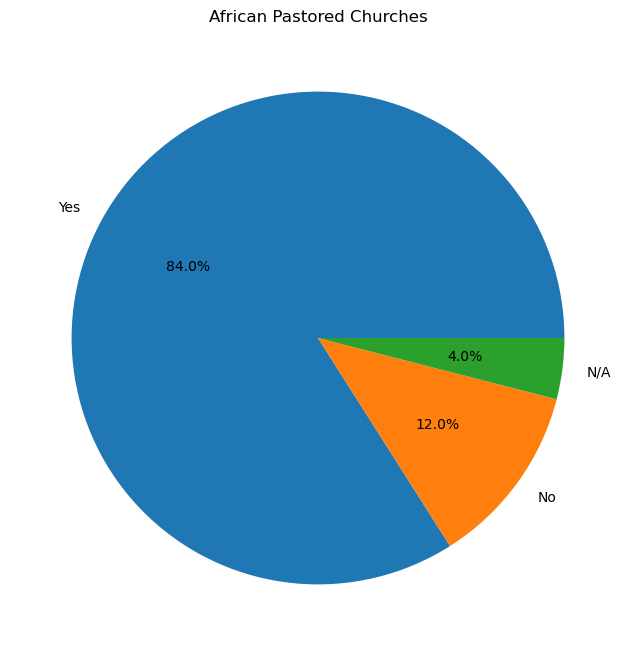

In [54]:
# Create a pie chart of service days
plt.figure(figsize=(8, 8))
plt.pie(pastors.values, labels=pastors.index, autopct='%1.1f%%')
plt.title('African Pastored Churches')
# Save the chart as a PNG file
plt.savefig('African pastors.png')
plt.show()

Insight

Denomography of immigrant: Visualizations to showcase the most populated by countries 


In [76]:
demography = data['populated_immigrant_country'].value_counts()

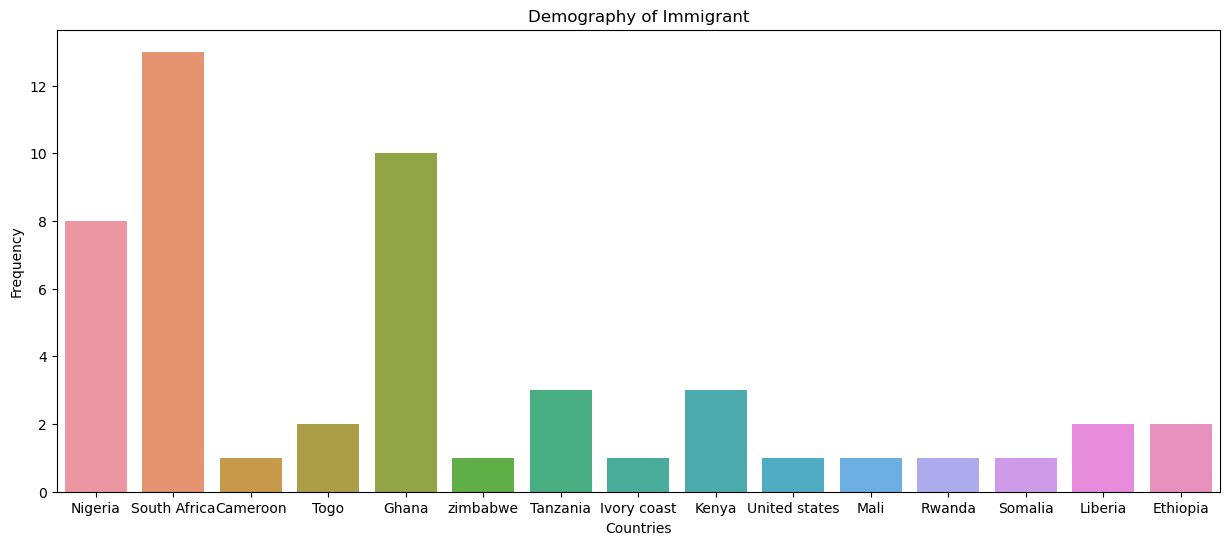

In [58]:
# Create a bar plot of service day frequencies
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x="populated_immigrant_country")
plt.title("Demography of Immigrant")
plt.xlabel("Countries")
plt.ylabel("Frequency")
# Save the chart as a PNG file
plt.savefig('Demography_immigrant.png')
plt.show()

Insight

Denominational Affiliations: Visualizations to showcase the denominational affiliations of African churches in Dallas.


In [74]:
denomination = data['category'].value_counts()

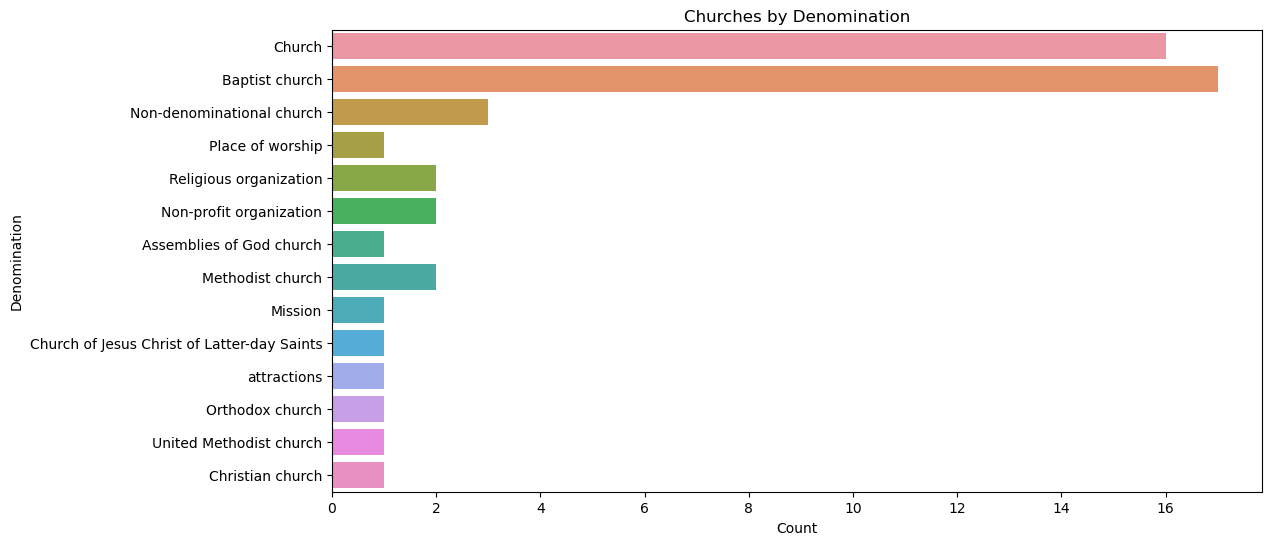

In [59]:
# Plot a count of churches by denomination
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y="category")
plt.title("Churches by Denomination")
plt.xlabel("Count")
plt.ylabel("Denomination")
# Save the chart as a PNG file
plt.savefig('church_deomination11.png')
plt.show()

Insight

Church ratings: The churches ratings by people who have attended the church. this visualization shows the ratings of the churches denomination

In [62]:
# Filter out rows with 'N/A' in the 'rating' column
filtered_data = data[data['rating'] != 'N/A']

In [63]:
# Calculate the average rating by denomination
average_rating = filtered_data.groupby('category')['rating'].mean().reset_index()


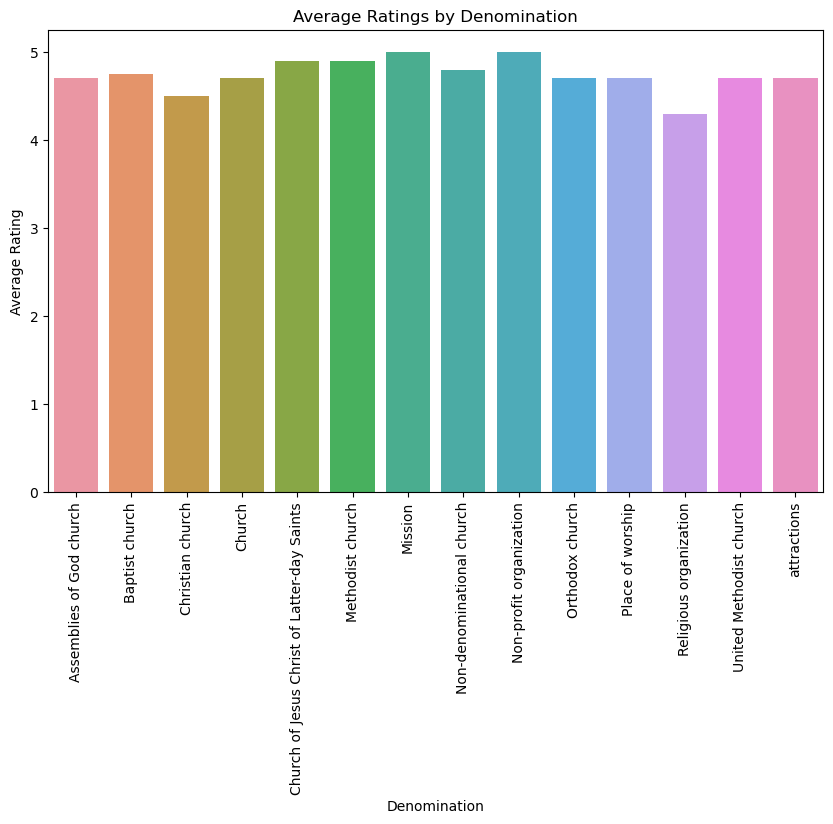

In [66]:
# Create a bar chart to visualize the average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='rating', data=average_rating)
plt.xlabel('Denomination')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Denomination')
plt.xticks(rotation=90)
# Save the chart as a PNG file
plt.savefig('Average ratings.png')
plt.show()

Insight

Geographic Distribution: Visualize the locations of African churches on a map of Dallas, highlighting the concentration of churches in different neighborhoods or areas. This helps users identify churches that are closer to their residential or work locations, making it easier for them to find a church that suits their convenience.


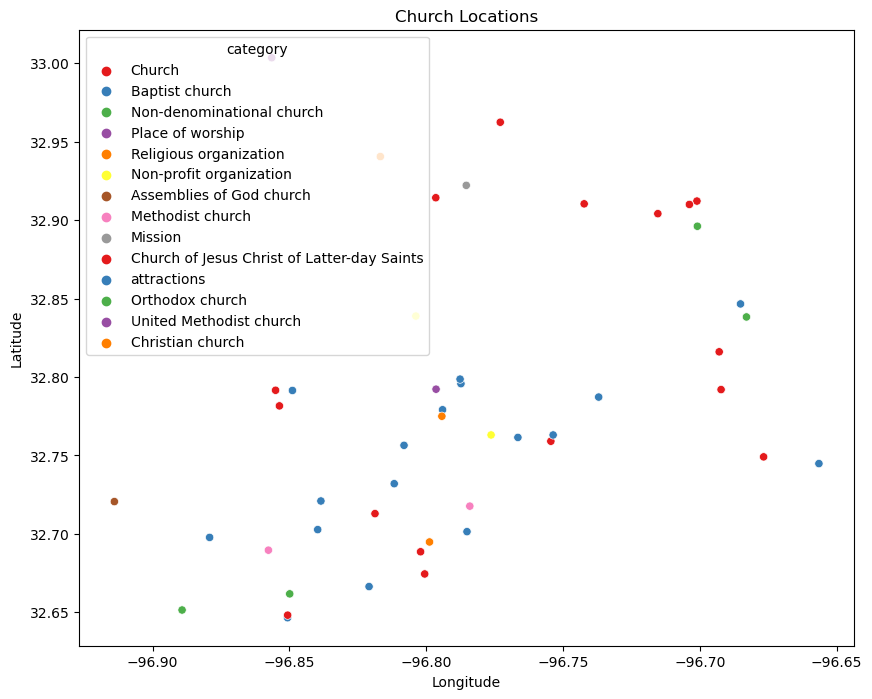

In [71]:
# Plot a scatter plot of church locations
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x="Longitude", y="Latitude", hue="category", palette="Set1")
plt.title("Church Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Save the chart as a PNG file
plt.savefig('Church_Locations1.png')
plt.show()

In [73]:
import plotly.express as px

# Plotting the geographic distribution of churches on a map
fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", hover_name="name",
                        hover_data=["full_address"], zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Geographic Distribution of African Pastored Churches in Dallas')
fig.show()

In [81]:
# Summary of the analysis and conclusions
print("Summary:")
print("- There are", len(data), "churches in the dataset.")
print("- The most common church denomination is", denomination.idxmax())
print("- The most populated demography of African country is", demography.idxmax())
print("- Sunday is the most common service day.")
print("- The churches are mostly pastored by Africans")

Summary:
- There are 50 churches in the dataset.
- The most common church denomination is Baptist church
- The most populated demography of African country is South Africa
- Sunday is the most common service day.
- The churches are mostly pastored by Africans
